1. Loading and Understanding the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from tabulate import tabulate  # To create a table format for the metrics






In [2]:
# Load the dataset
dataset = pd.read_csv('dataset_churn.csv')

In [3]:
# Display the first few rows
print(dataset.head())


   Unnamed: 0                            CustomerID   Age  Gender  Tenure  \
0           0  08729464-bde6-43bc-8f63-a357096feab1  56.0    Male      13   
1           1  af95bc95-baf4-4318-a21d-70d2ea3148b7  69.0    Male      13   
2           2  1fe7eee6-2227-4400-9998-4d993f4a60fd  46.0    Male      60   
3           3  f736fe7b-1b44-4acd-84c2-21c4aef648be  32.0  Female      57   
4           4  4b40d12d-7633-4309-96b8-aee675ea20ae  60.0    Male      52   

  Service_Internet Service_Phone Service_TV        Contract     PaymentMethod  \
0              DSL           Yes         No        One year      Mailed check   
1              DSL            No        Yes        Two year      Mailed check   
2      Fiber optic            No        Yes  Month-to-month      Mailed check   
3      Fiber optic           Yes        Yes  Month-to-month     Bank transfer   
4      Fiber optic           Yes        Yes        Two year  Electronic check   

   MonthlyCharges  TotalCharges StreamingMovies St

In [4]:
# Understanding the dataset structure
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3749 non-null   int64  
 1   CustomerID        3749 non-null   object 
 2   Age               3562 non-null   float64
 3   Gender            3749 non-null   object 
 4   Tenure            3749 non-null   int64  
 5   Service_Internet  3028 non-null   object 
 6   Service_Phone     3749 non-null   object 
 7   Service_TV        3749 non-null   object 
 8   Contract          3749 non-null   object 
 9   PaymentMethod     3562 non-null   object 
 10  MonthlyCharges    3749 non-null   float64
 11  TotalCharges      3749 non-null   float64
 12  StreamingMovies   3749 non-null   object 
 13  StreamingMusic    3749 non-null   object 
 14  OnlineSecurity    3749 non-null   object 
 15  TechSupport       3749 non-null   object 
 16  Churn             3749 non-null   object 


2.Data Cleaning:

In [5]:
# Dropping unnecessary columns
data = dataset.drop(columns=['Unnamed: 0', 'CustomerID'])

In [6]:
data.isnull().sum()

Age                 187
Gender                0
Tenure                0
Service_Internet    721
Service_Phone         0
Service_TV            0
Contract              0
PaymentMethod       187
MonthlyCharges        0
TotalCharges          0
StreamingMovies       0
StreamingMusic        0
OnlineSecurity        0
TechSupport           0
Churn                 0
dtype: int64

In [7]:
data.dtypes

Age                 float64
Gender               object
Tenure                int64
Service_Internet     object
Service_Phone        object
Service_TV           object
Contract             object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
StreamingMovies      object
StreamingMusic       object
OnlineSecurity       object
TechSupport          object
Churn                object
dtype: object

In [8]:
#Handaling the missing value of the age
data['Age'].fillna(data['Age'].median(), inplace=True)

#Handaling the missing value of the categorical
data['PaymentMethod'].fillna(data['PaymentMethod'].mode()[0], inplace=True)

data['Service_Internet'].fillna(data['Service_Internet'].mode()[0], inplace=True)

In [9]:
data.isnull().sum()

Age                 0
Gender              0
Tenure              0
Service_Internet    0
Service_Phone       0
Service_TV          0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
StreamingMovies     0
StreamingMusic      0
OnlineSecurity      0
TechSupport         0
Churn               0
dtype: int64

In [10]:
# List of categorical columns to be encoded
category_cols = ['Gender', 'Service_Internet', 'Service_Phone', 'Service_TV',
                 'Contract', 'PaymentMethod', 'StreamingMovies', 'StreamingMusic',
                 'OnlineSecurity', 'TechSupport', 'Churn']

# Applying Label Encoding to each categorical column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in category_cols:
    data[col] = encoder.fit_transform(data[col])

# Display the first few rows of the updated dataset
data.head()


,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,56.0,1,13,0,1,0,1,3,71.88,931.49,0,0,1,0,0
1,69.0,1,13,0,0,1,2,3,110.99,1448.46,1,1,0,0,0
2,46.0,1,60,1,0,1,0,3,116.74,6997.73,1,1,0,0,0
3,32.0,0,57,1,1,1,0,0,78.16,4452.13,0,1,0,1,0
4,60.0,1,52,1,1,1,2,2,30.33,1569.73,1,0,1,1,0


Handle Outliers:

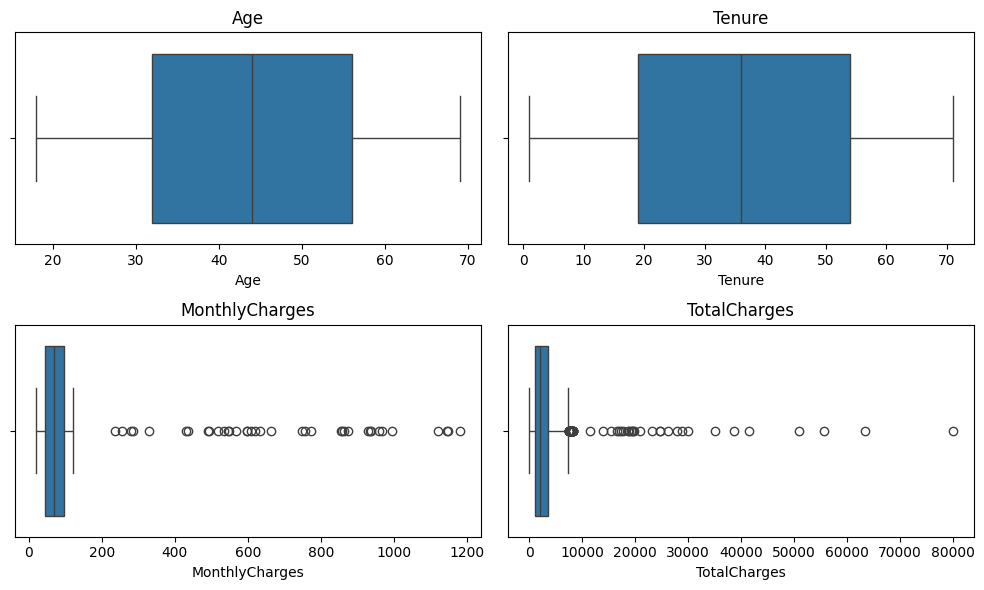

In [11]:


# Ensure 'numerical_feature' is defined and contains correct column names
# For example:
numerical_feature = ['Age','Tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical_feature, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])  # Use 'feature' to access column
    plt.title(feature)

plt.tight_layout()
plt.show()

In [12]:
def replace_outliers_with_median(data, column):
    # Check if column exists in the DataFrame
    if column not in data.columns:
        print(f"Column '{column}' not found in the DataFrame!")
        return data

    # Ensure the column is numeric
    if not np.issubdtype(data[column].dtype, np.number):
        print(f"Column '{column}' is not numeric, skipping...")
        return data

    # Calculate the first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the median value for the column
    median_value = data[column].median()

    # Replace outliers with the median
    data[column] = np.where(
        (data[column] < lower_bound) | (data[column] > upper_bound),
        median_value,
        data[column]
    )

    return data

# Loop over the numerical features and apply the outlier replacement
# Use 'numerical_feature' instead of 'numerical_features'
for feature in numerical_feature:
    data = replace_outliers_with_median(data, feature)

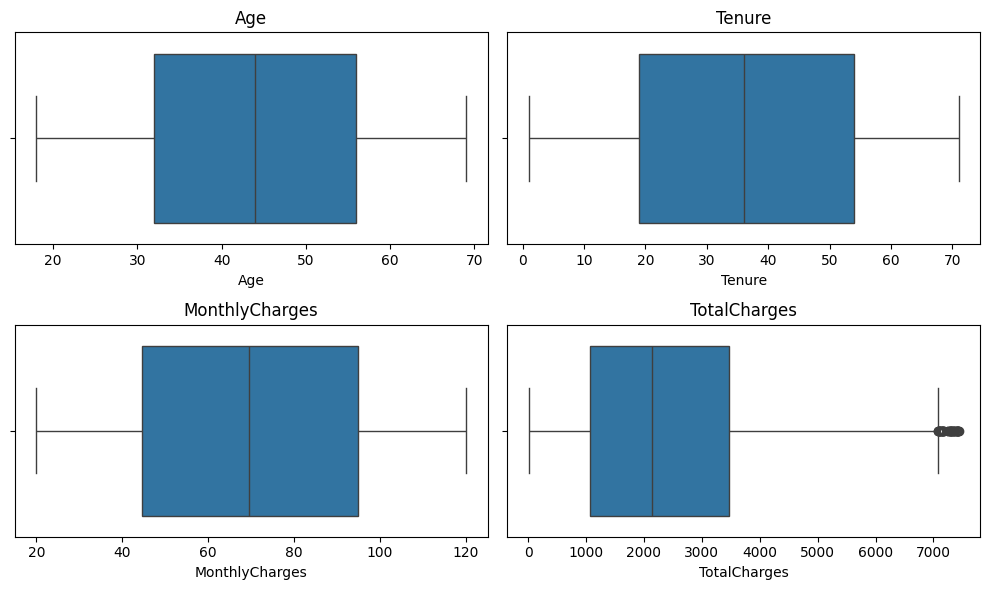

In [13]:
plt.figure(figsize=(10, 6))
# Iterate over the correct variable name 'numerical_feature'
for i, feature in enumerate(numerical_feature, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


3. Exploratory Data Analysis (EDA)

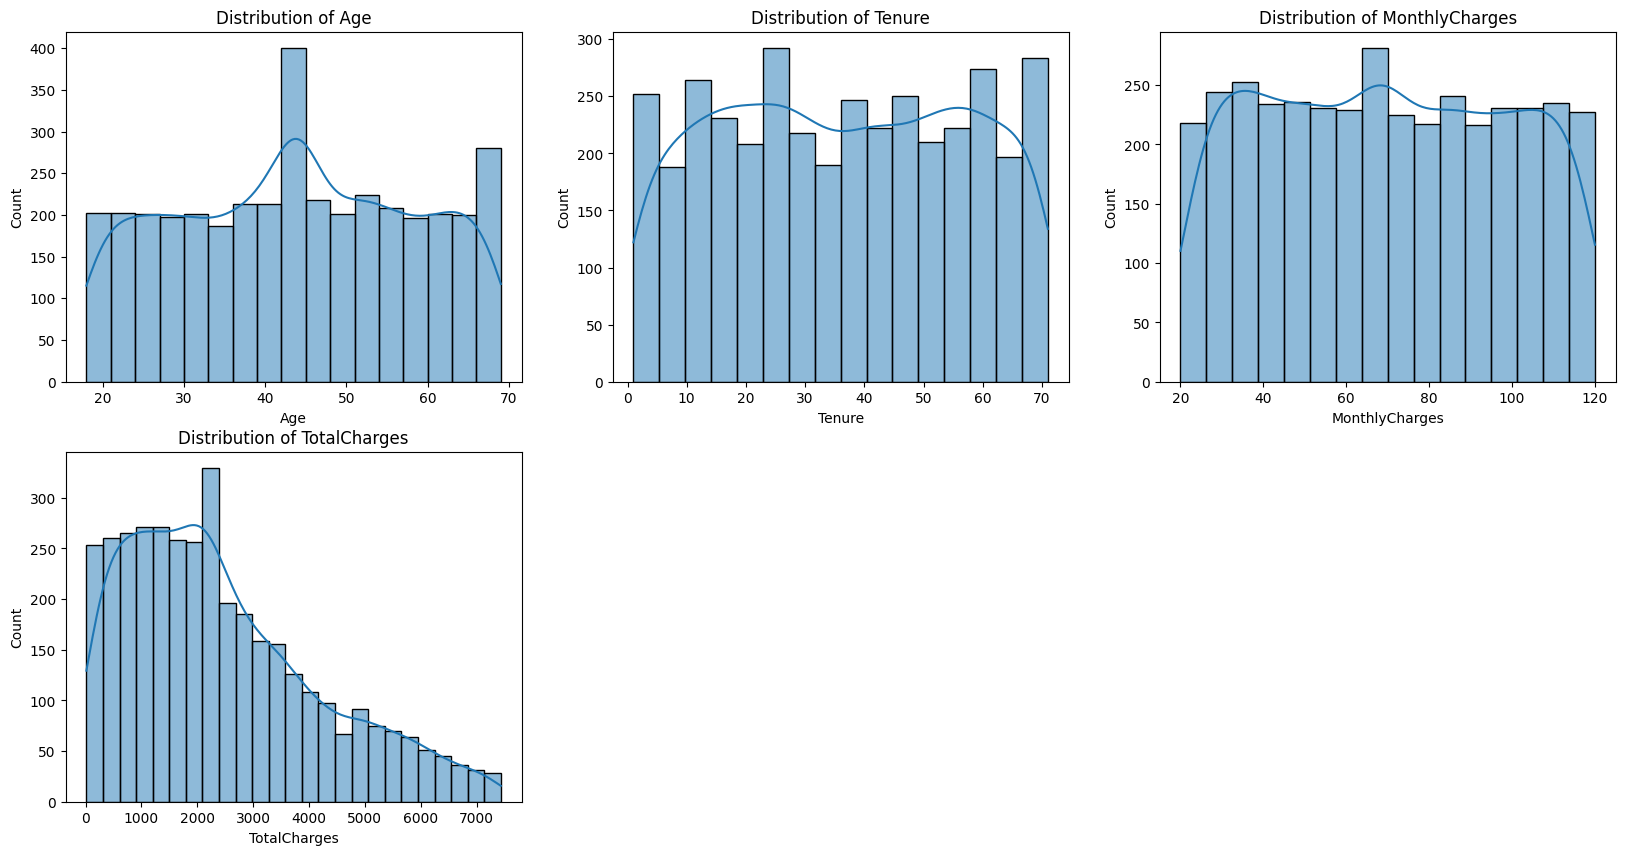

In [14]:
plt.figure(figsize=(20,10))
for i , col in enumerate(numerical_feature, 1):
    plt.subplot(2,3,i)
    sns.histplot(data[col],kde=True)
    plt.title(f'Distribution of {col}')
plt.show()

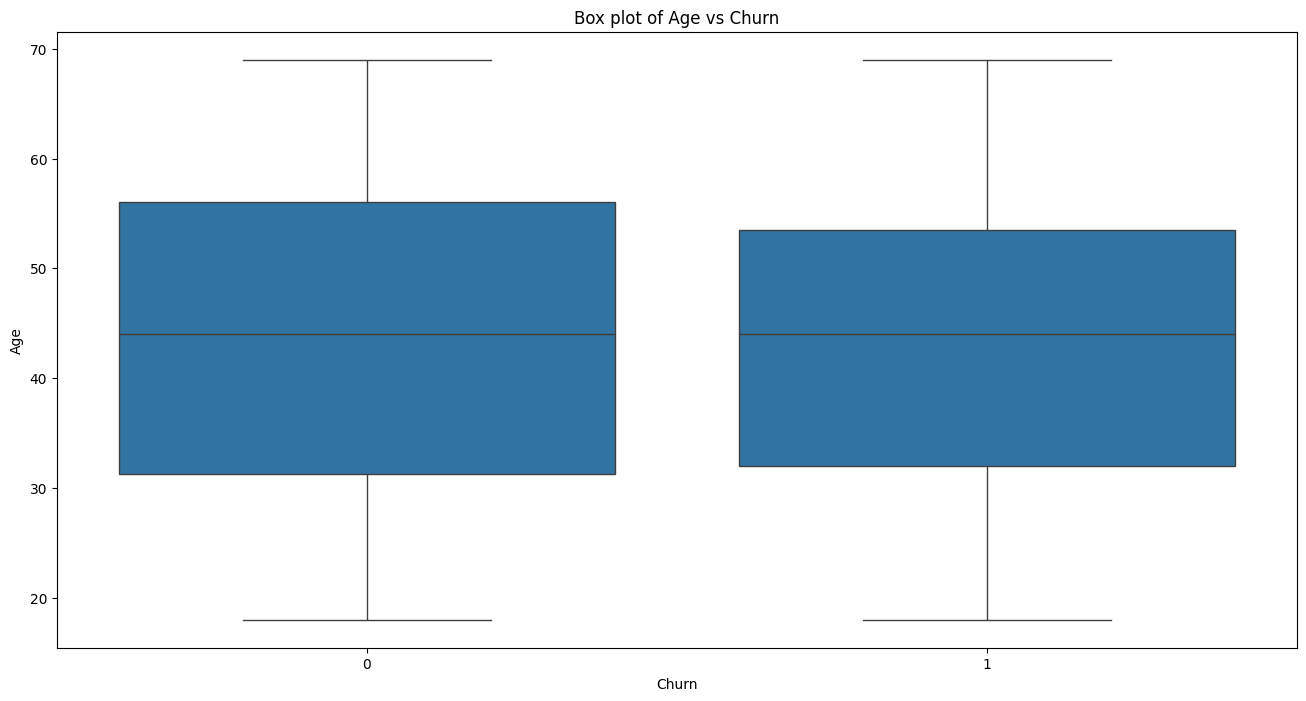

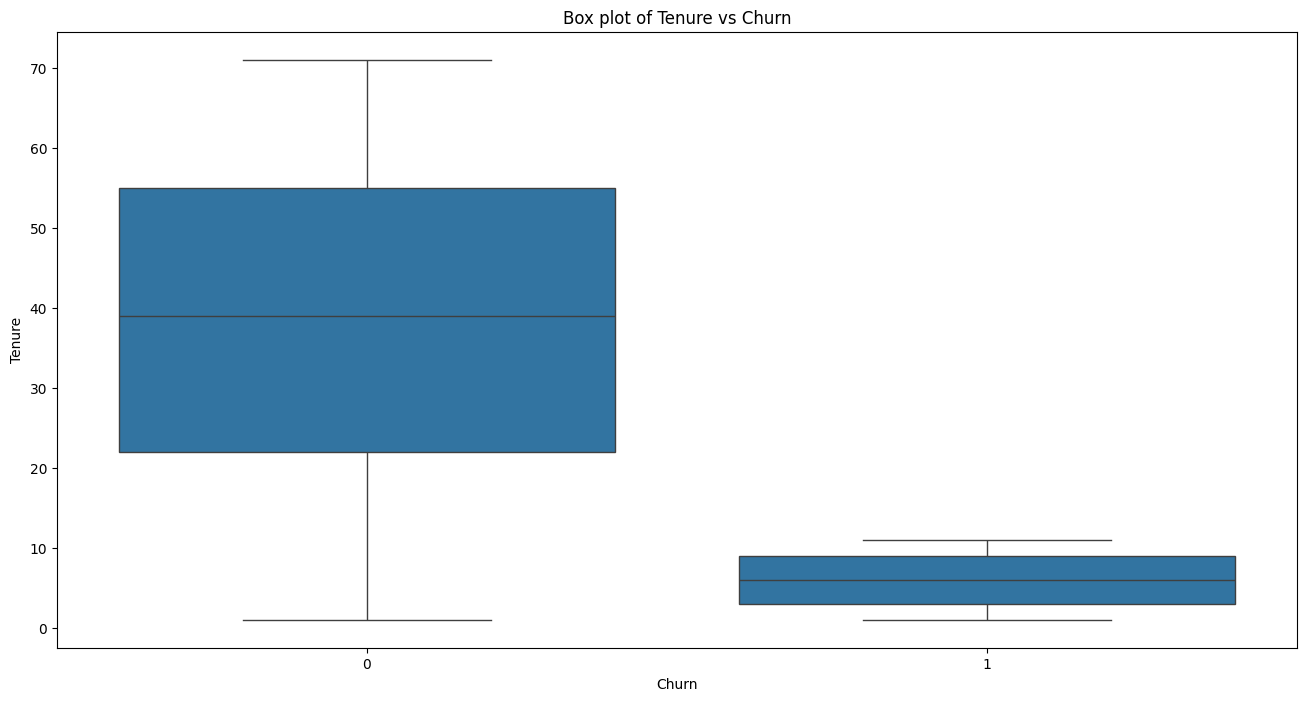

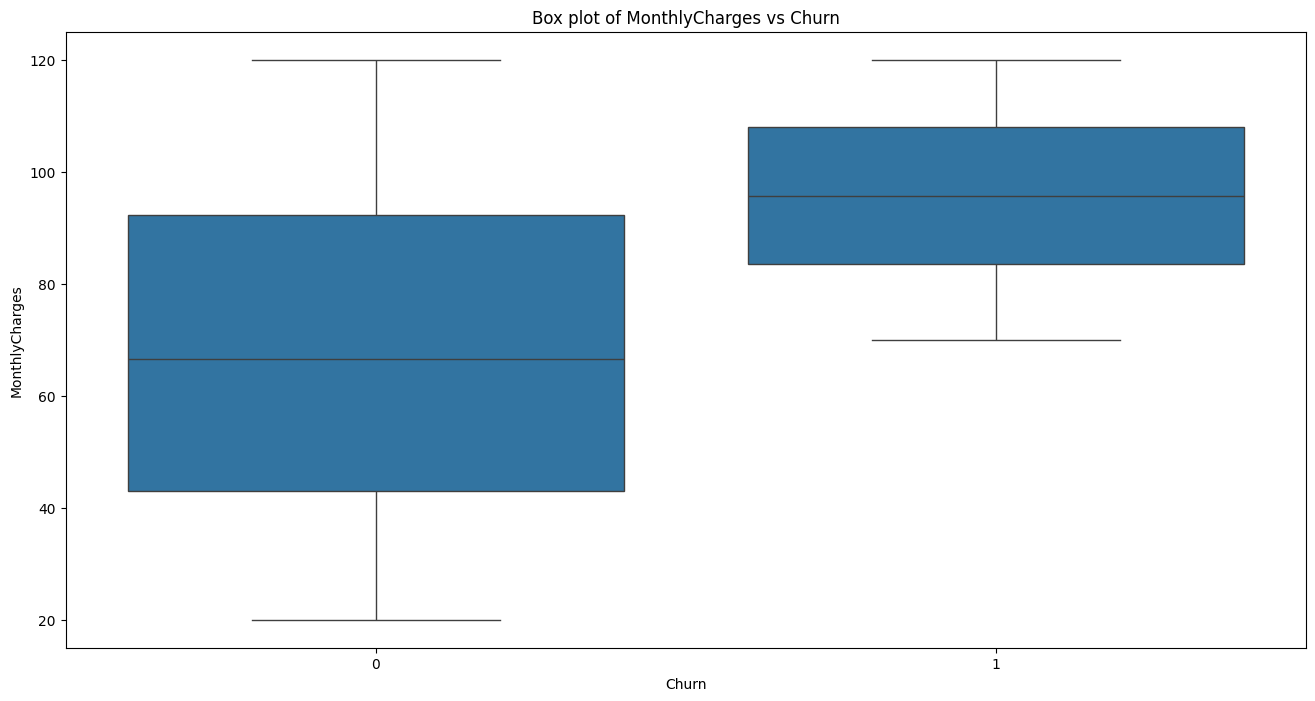

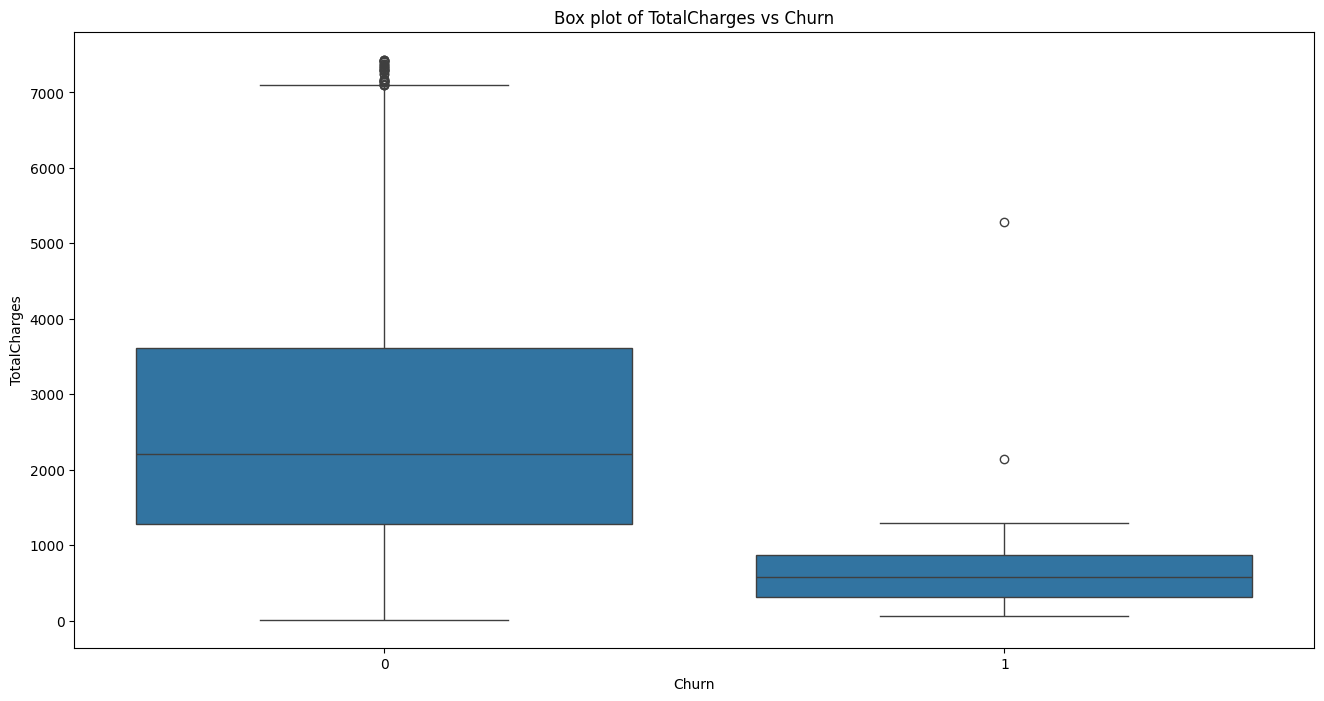

In [15]:
for feature in numerical_feature:
    plt.figure(figsize=(16,8))
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'Box plot of {feature} vs Churn')
    plt.show()

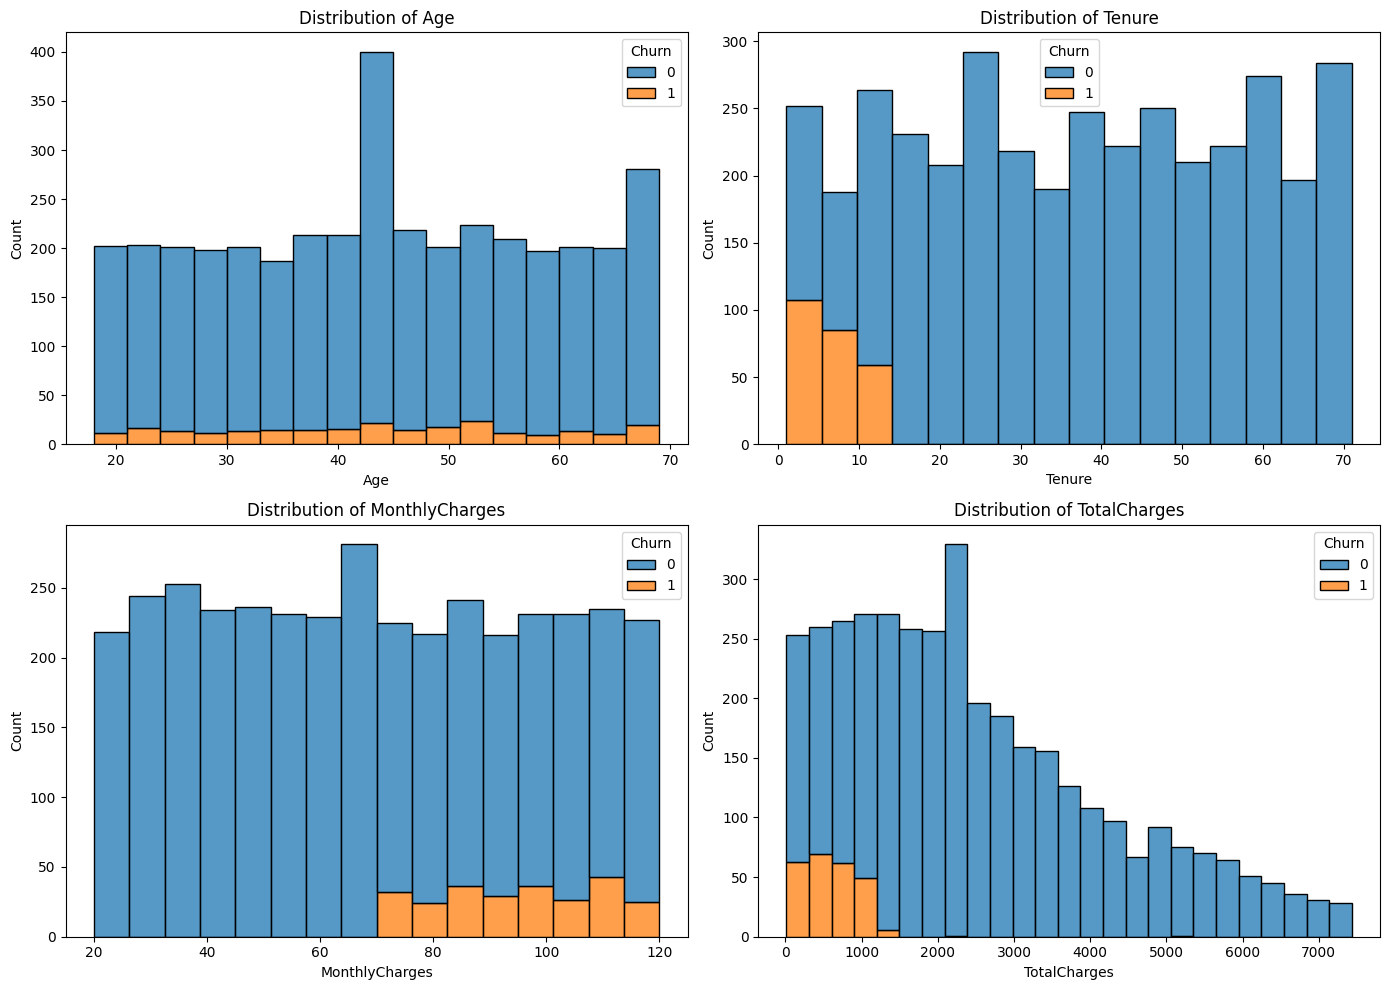

In [16]:
plt.figure(figsize=(14, 10))
for i,feature in enumerate(numerical_feature,1):
    plt.subplot(2,2,i)
    sns.histplot(data=data, x=feature, hue='Churn', multiple='stack')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

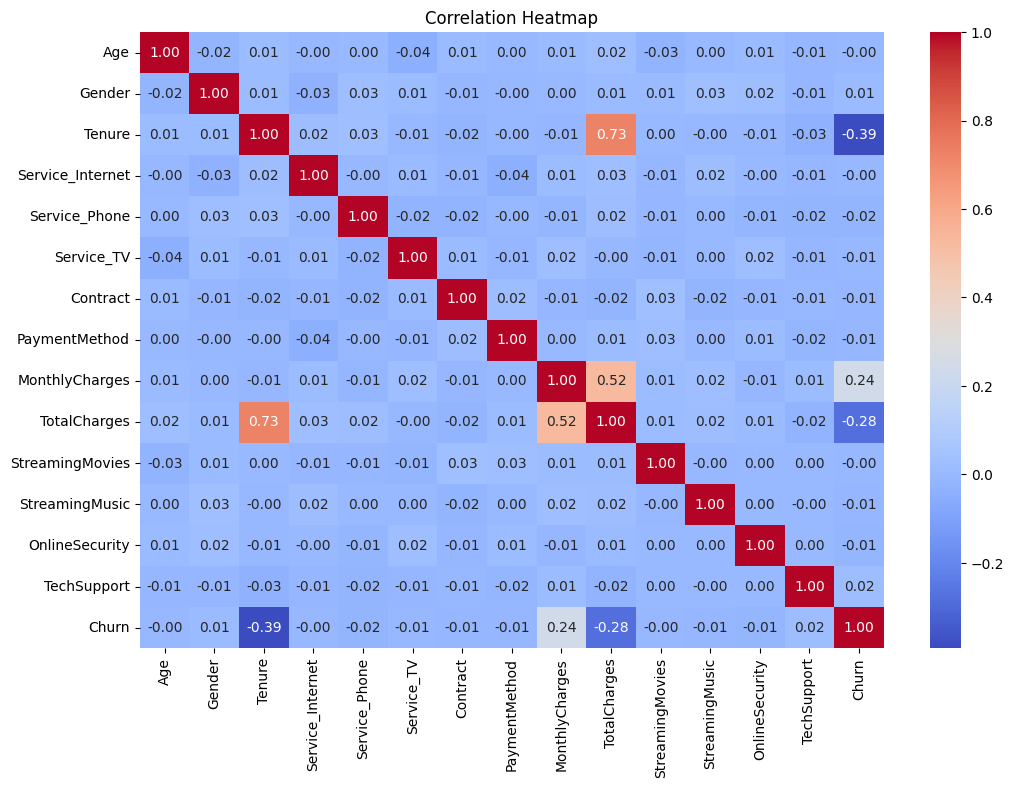

In [17]:
corr=data.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

4. Feature Engineering

In [18]:
# Function to engineer new features
def feature_engineering(data):

    data['MonthlyCharges_per_Tenure'] = data['MonthlyCharges'] / (data['Tenure'] + 1)

    data['TotalCharges_per_Tenure'] = data['TotalCharges'] / (data['Tenure'] + 1)

    # Total number of services
    data['TotalServices'] = (data['Service_Internet'] + data['Service_Phone'] + data['Service_TV'] +
                             data['StreamingMovies'] + data['StreamingMusic'] + data['OnlineSecurity'] + data['TechSupport'])

    # Flag for high probability of Churn status

    data['churn_high_probability'] = (data['Tenure'] <= 20).astype(int)

    return data


data = feature_engineering(data)

data.head()


,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn,MonthlyCharges_per_Tenure,TotalCharges_per_Tenure,TotalServices,churn_high_probability
0,56.0,1,13.0,0,1,0,1,3,71.88,931.49,0,0,1,0,0,5.134286,66.535000,2,1
1,69.0,1,13.0,0,0,1,2,3,110.99,1448.46,1,1,0,0,0,7.927857,103.461429,3,1
2,46.0,1,60.0,1,0,1,0,3,116.74,6997.73,1,1,0,0,0,1.913770,114.716885,4,0
3,32.0,0,57.0,1,1,1,0,0,78.16,4452.13,0,1,0,1,0,1.347586,76.760862,5,0
4,60.0,1,52.0,1,1,1,2,2,30.33,1569.73,1,0,1,1,0,0.572264,29.617547,6,0


Splitting the data:

In [19]:

X = data.drop('Churn', axis=1)
y = data['Churn']

X.head()

,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,MonthlyCharges_per_Tenure,TotalCharges_per_Tenure,TotalServices,churn_high_probability
0,56.0,1,13.0,0,1,0,1,3,71.88,931.49,0,0,1,0,5.134286,66.535000,2,1
1,69.0,1,13.0,0,0,1,2,3,110.99,1448.46,1,1,0,0,7.927857,103.461429,3,1
2,46.0,1,60.0,1,0,1,0,3,116.74,6997.73,1,1,0,0,1.913770,114.716885,4,0
3,32.0,0,57.0,1,1,1,0,0,78.16,4452.13,0,1,0,1,1.347586,76.760862,5,0
4,60.0,1,52.0,1,1,1,2,2,30.33,1569.73,1,0,1,1,0.572264,29.617547,6,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Selection:

In [21]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


=== Logistic Regression ===
╒══════════════════════════╤═════════╕
│ Metric                   │   Value │
╞══════════════════════════╪═════════╡
│ Accuracy                 │  0.9693 │
├──────────────────────────┼─────────┤
│ Precision (Weighted Avg) │  0.9778 │
├──────────────────────────┼─────────┤
│ Recall (Weighted Avg)    │  0.9693 │
├──────────────────────────┼─────────┤
│ F1-Score (Weighted Avg)  │  0.9719 │
╘══════════════════════════╧═════════╛




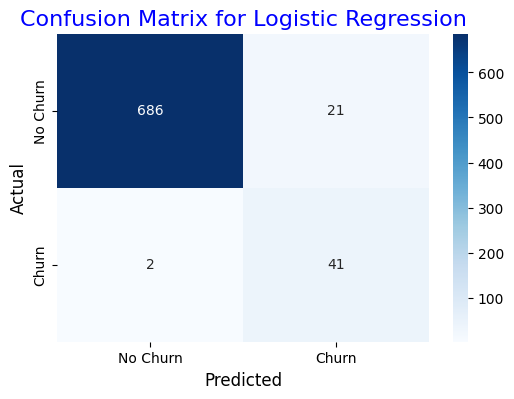


=== Decision Tree ===
╒══════════════════════════╤═════════╕
│ Metric                   │   Value │
╞══════════════════════════╪═════════╡
│ Accuracy                 │  0.9987 │
├──────────────────────────┼─────────┤
│ Precision (Weighted Avg) │  0.9987 │
├──────────────────────────┼─────────┤
│ Recall (Weighted Avg)    │  0.9987 │
├──────────────────────────┼─────────┤
│ F1-Score (Weighted Avg)  │  0.9987 │
╘══════════════════════════╧═════════╛




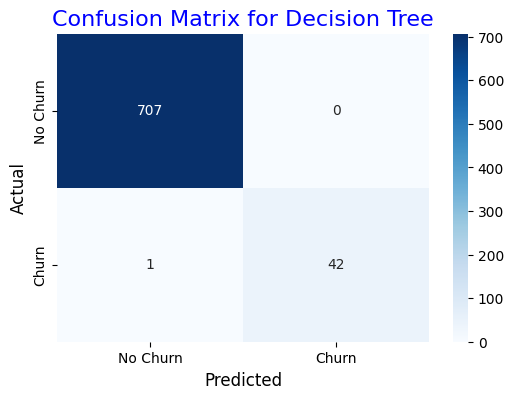


=== Random Forest ===
╒══════════════════════════╤═════════╕
│ Metric                   │   Value │
╞══════════════════════════╪═════════╡
│ Accuracy                 │  0.9987 │
├──────────────────────────┼─────────┤
│ Precision (Weighted Avg) │  0.9987 │
├──────────────────────────┼─────────┤
│ Recall (Weighted Avg)    │  0.9987 │
├──────────────────────────┼─────────┤
│ F1-Score (Weighted Avg)  │  0.9987 │
╘══════════════════════════╧═════════╛




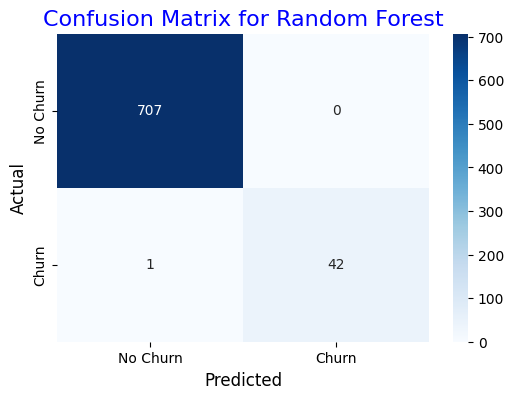


=== Support Vector Machine ===
╒══════════════════════════╤═════════╕
│ Metric                   │   Value │
╞══════════════════════════╪═════════╡
│ Accuracy                 │  0.9747 │
├──────────────────────────┼─────────┤
│ Precision (Weighted Avg) │  0.9795 │
├──────────────────────────┼─────────┤
│ Recall (Weighted Avg)    │  0.9747 │
├──────────────────────────┼─────────┤
│ F1-Score (Weighted Avg)  │  0.9762 │
╘══════════════════════════╧═════════╛




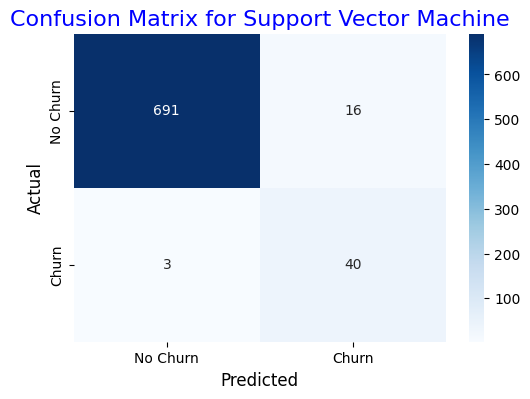

In [22]:


# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with class weights and updated iterations
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC(class_weight='balanced')

# Function to plot confusion matrix with heatmap
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(title, fontsize=16, color="blue")
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.show()

# Function to display evaluation metrics as a table
def display_metrics_table(model_name, accuracy, report):
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    metrics_data = [["Accuracy", f"{accuracy:.4f}"],
                    ["Precision (Weighted Avg)", f"{precision:.4f}"],
                    ["Recall (Weighted Avg)", f"{recall:.4f}"],
                    ["F1-Score (Weighted Avg)", f"{f1:.4f}"]]

    print(f"\n=== {model_name} ===")
    print(tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))
    print("\n")

# Training, predicting, and evaluating models
for model_name, model in {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Support Vector Machine": svm
}.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

    display_metrics_table(model_name, accuracy, report)
    plot_confusion_matrix(y_test, y_pred, f"Confusion Matrix for {model_name}")


Evaluating Default Models...
Evaluating Tuned Models...

Logistic Regression - Default Model Performance
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       707
           1       0.66      0.95      0.78        43

    accuracy                           0.97       750
   macro avg       0.83      0.96      0.88       750
weighted avg       0.98      0.97      0.97       750



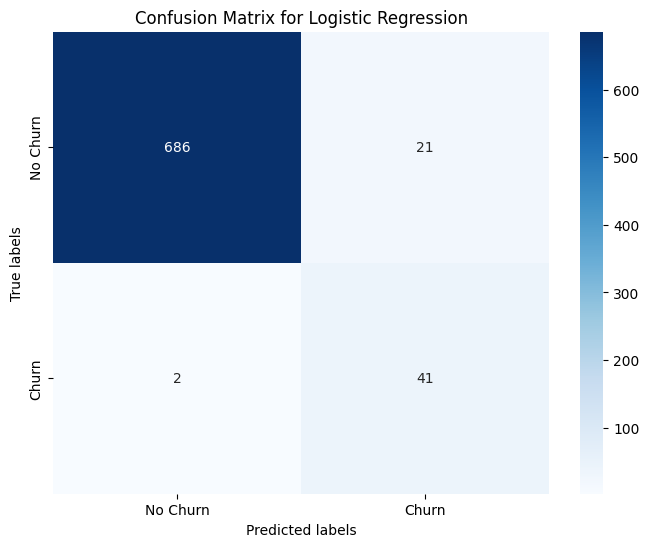


Decision Tree - Default Model Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



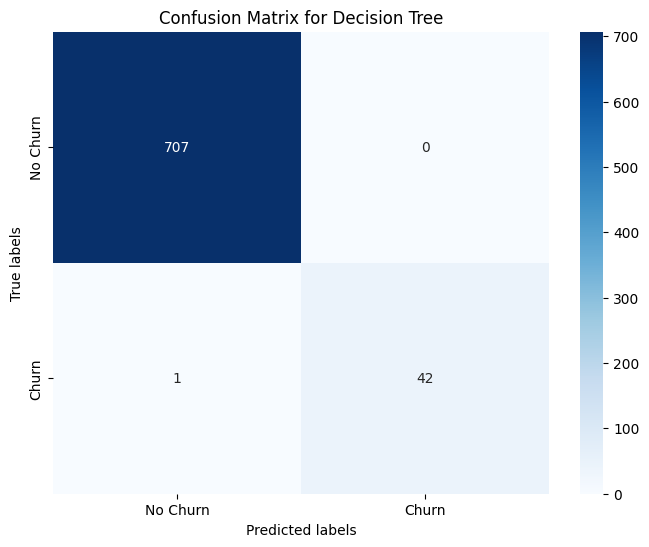


Random Forest - Default Model Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



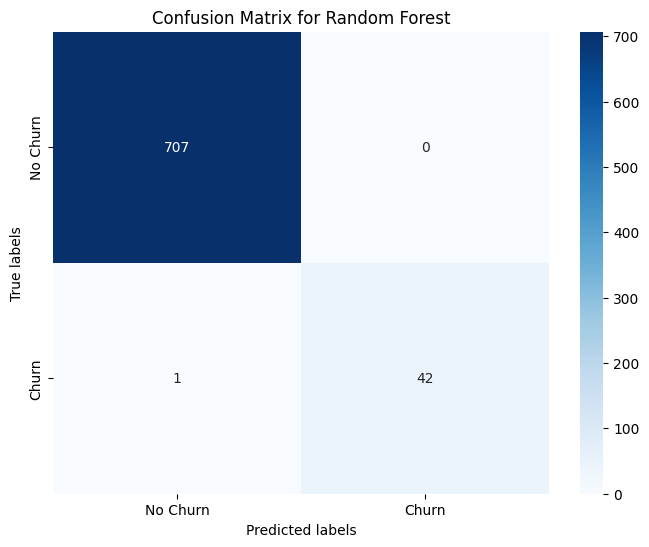


Support Vector Machine - Default Model Performance
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       707
           1       0.71      0.93      0.81        43

    accuracy                           0.97       750
   macro avg       0.85      0.95      0.90       750
weighted avg       0.98      0.97      0.98       750



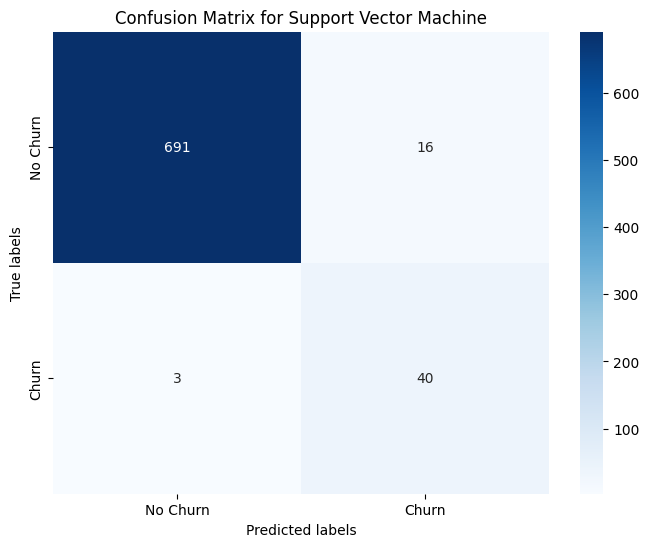


Tuned Logistic Regression - Tuned Model Performance
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       707
           1       0.66      0.95      0.78        43

    accuracy                           0.97       750
   macro avg       0.83      0.96      0.88       750
weighted avg       0.98      0.97      0.97       750



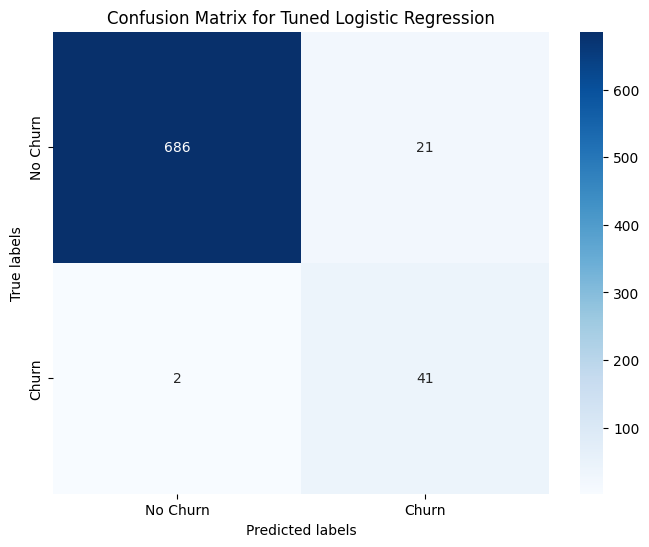


Tuned Decision Tree - Tuned Model Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



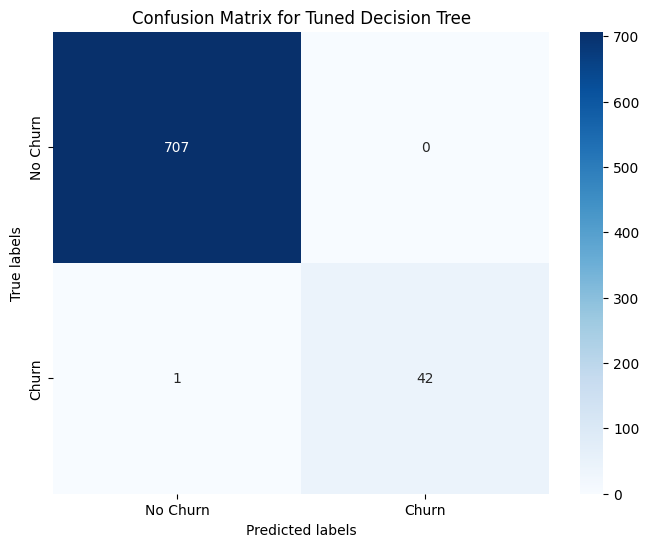


Tuned Random Forest - Tuned Model Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       707
           1       1.00      0.98      0.99        43

    accuracy                           1.00       750
   macro avg       1.00      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



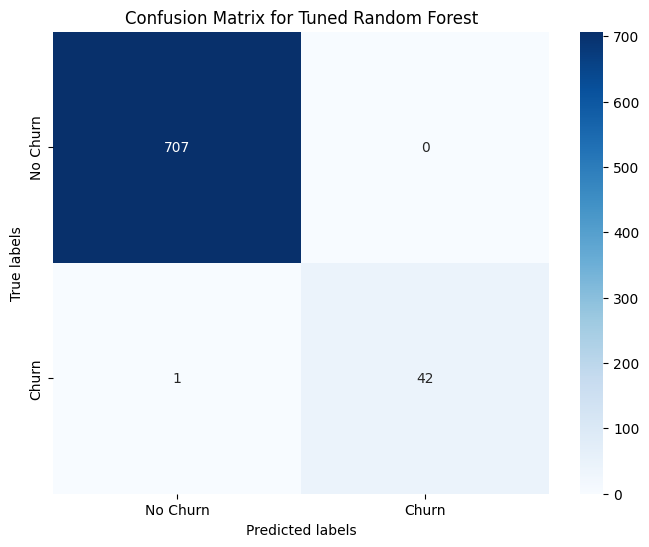


Tuned Support Vector Machine - Tuned Model Performance
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       707
           1       0.71      0.93      0.81        43

    accuracy                           0.97       750
   macro avg       0.85      0.95      0.90       750
weighted avg       0.98      0.97      0.98       750



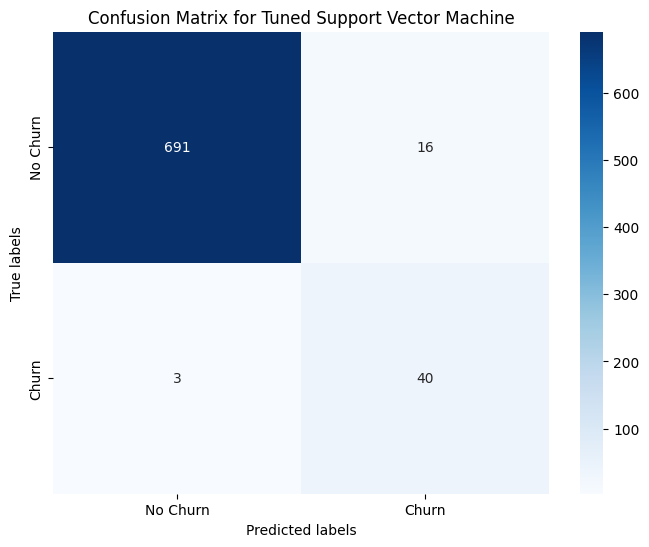

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compare performance
def compare_models(models, X_train, X_test, y_train, y_test):
    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Get accuracy, classification report with zero_division=1, and confusion matrix
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=1)  # Handling undefined metrics
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store results
        results[model_name] = {
            'accuracy': accuracy,
            'report': report,
            'conf_matrix': conf_matrix
        }

    return results

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    class_names = ["No Churn", "Churn"]  # Define class names
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Default models with increased max_iter and class_weight
default_models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced'),  # Increased max_iter and balanced class weight
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(class_weight='balanced')  # Handle class imbalance
}

# Tuned models - Placeholder models for now. Replace with actual tuned models.
tuned_models = {
    "Tuned Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced', solver='saga'),  # Use 'saga' solver for tuning
    "Tuned Decision Tree": DecisionTreeClassifier(),  # Tuned Decision Tree
    "Tuned Random Forest": RandomForestClassifier(),  # Tuned Random Forest
    "Tuned Support Vector Machine": SVC(class_weight='balanced')  # Tuned SVM
}

# Evaluate default models
print("Evaluating Default Models...")
default_results = compare_models(default_models, X_train_scaled, X_test_scaled, y_train, y_test)

# Evaluate tuned models
print("Evaluating Tuned Models...")
tuned_results = compare_models(tuned_models, X_train_scaled, X_test_scaled, y_train, y_test)

# Print and compare results
for model_name in default_results:
    print(f"\n{model_name} - Default Model Performance")
    print(default_results[model_name]['report'])
    plot_confusion_matrix(default_results[model_name]['conf_matrix'], model_name)

for model_name in tuned_results:
    print(f"\n{model_name} - Tuned Model Performance")
    print(tuned_results[model_name]['report'])
    plot_confusion_matrix(tuned_results[model_name]['conf_matrix'], model_name)


In [24]:
import pickle
import os
# Create the directory if it doesn't exist
import os
os.makedirs('/content/drive/MyDrive/maschineL/model', exist_ok=True)

# Now you can safely save the models
pickle.dump(LogisticRegression, open('/content/drive/MyDrive/maschineL/model/Tuned LogisticRegression.pkl', 'wb'))
pickle.dump(DecisionTreeClassifier, open('/content/drive/MyDrive/maschineL/model/Tuned DecisionTreeClassifier.pkl', 'wb'))
pickle.dump(RandomForestClassifier, open('/content/drive/MyDrive/maschineL/model/Tuned RandomForestClassifier.pkl', 'wb'))
pickle.dump(SVC, open('/content/drive/MyDrive/maschineL/model/Tuned SVC.pkl','wb'))